# Setting up the project

First of all let's import all the necessary libraries: **NumPy, Pandas, Matplotlib and Seaborn.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Let's use *%matblotlib inline* so we can conveniently use it in Jupyter Notebook

In [2]:
%matplotlib inline

Let's also set up the notebook so it is wider and more convenient to use it to plot graphs

In [3]:
# change the cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# see all columns of df
pd.set_option('display.max_columns', None)
pd.set_option('max_rows', 200)

# Reading data  
Data we need to operate on is contained in **CSV** format inside of the **Excel file**.
After reading data is to put into the **DataFrame**

In [4]:
df = pd.read_excel('concrete_data.xls')

We obtained the table of 9 columns and 1030 rows, where columns 0-7 are *input variables* - **concrete components** and column 8 is an *output variable* - **concrete conpressive strength**. We should find *dependency (regression)* of the output varible on the input variables.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

Let's see the first and the last *10 rows* in the table and some basic info about its contents

In [6]:
df.head(10)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [7]:
df.tail(10)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
1020,288.4,121.0,0.0,177.4,7.0,907.9,829.5,28,42.140084
1021,298.2,0.0,107.0,209.7,11.1,879.6,744.2,28,31.875165
1022,264.5,111.0,86.5,195.5,5.9,832.6,790.4,28,41.542308
1023,159.8,250.0,0.0,168.4,12.2,1049.3,688.2,28,39.455954
1024,166.0,259.7,0.0,183.2,12.7,858.8,826.8,28,37.917043
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.401235


In [8]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


Let's lessen the column names of the DataFrame so they are better presented in graphs

In [9]:
concrete_data = df.rename(columns = {
                        'Cement (component 1)(kg in a m^3 mixture)':'Cement',
                         'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Blast Furnace Slag',
                         'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly Ash',
                         'Water  (component 4)(kg in a m^3 mixture)':'Water',
                         'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer',
                         'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse Aggregate',
                         'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine Aggregate',
                         'Age (day)':'Age',
                         'Concrete compressive strength(MPa, megapascals) ':'Compressive strength'
                        })
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cement                1030 non-null   float64
 1   Blast Furnace Slag    1030 non-null   float64
 2   Fly Ash               1030 non-null   float64
 3   Water                 1030 non-null   float64
 4   Superplasticizer      1030 non-null   float64
 5   Coarse Aggregate      1030 non-null   float64
 6   Fine Aggregate        1030 non-null   float64
 7   Age                   1030 non-null   int64  
 8   Compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


# Correlations  

The **first step** is to understand the data and gain insights from the data before doing any modelling.  
  
  
Let us check the *correlations* between the input features, this will give an idea about how each variable is affecting all other variables. This can be done by calculating **correlations** between the features.

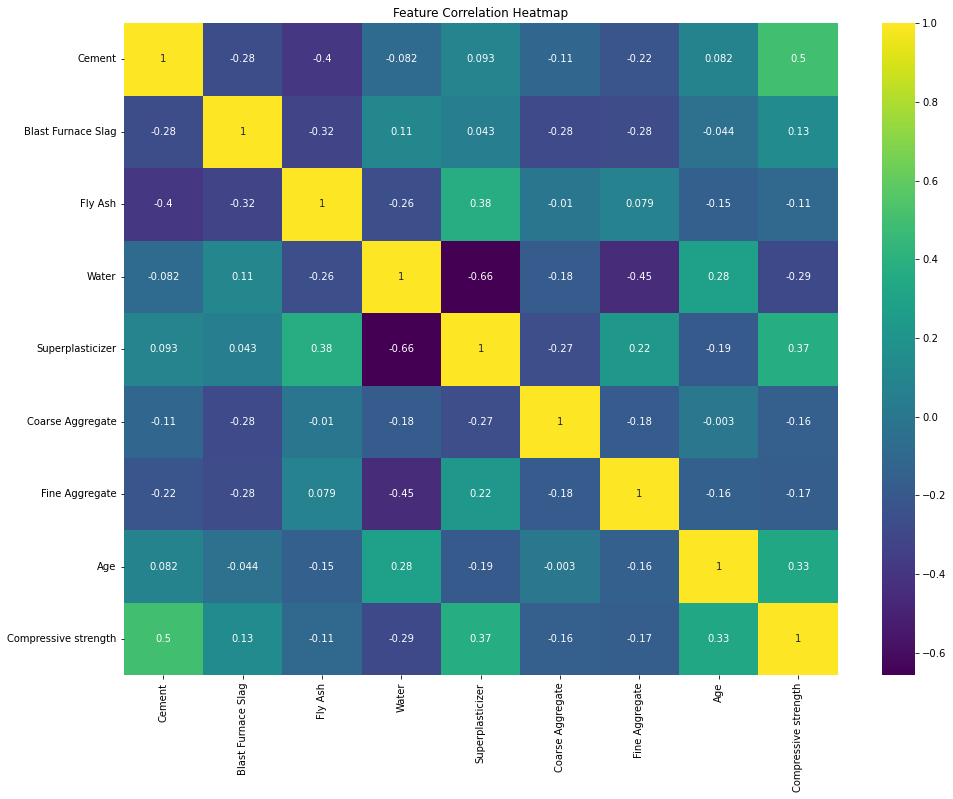

In [10]:
corr = concrete_data.corr()

plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title("Feature Correlation Heatmap")
plt.show()

We can observe a high *positive correlation* between **Compressive Strength** and **Cement**. This is true because strength concrete indeed increases with an increase in the amount of cement used in preparing it. Also, **Age** and **Super Plasticizer** are the other two factors influencing **Compressive Strength**.  
There are other strong correlations between the features,  
- A strong *negative correlation* between **Super Plasticizer** and **Water**.
- *Positive correlations* between **Super Plasticizer** and **Fly Ash**, **Fine Aggregate**.

# Pairwise relations  
These correlations are useful to understand the data in detail, as they give an idea about how a variable is affecting the other. We can further use a **pairplot** in Seaborn to plot pairwise relations between all the features and distributions of features along the diagonal.

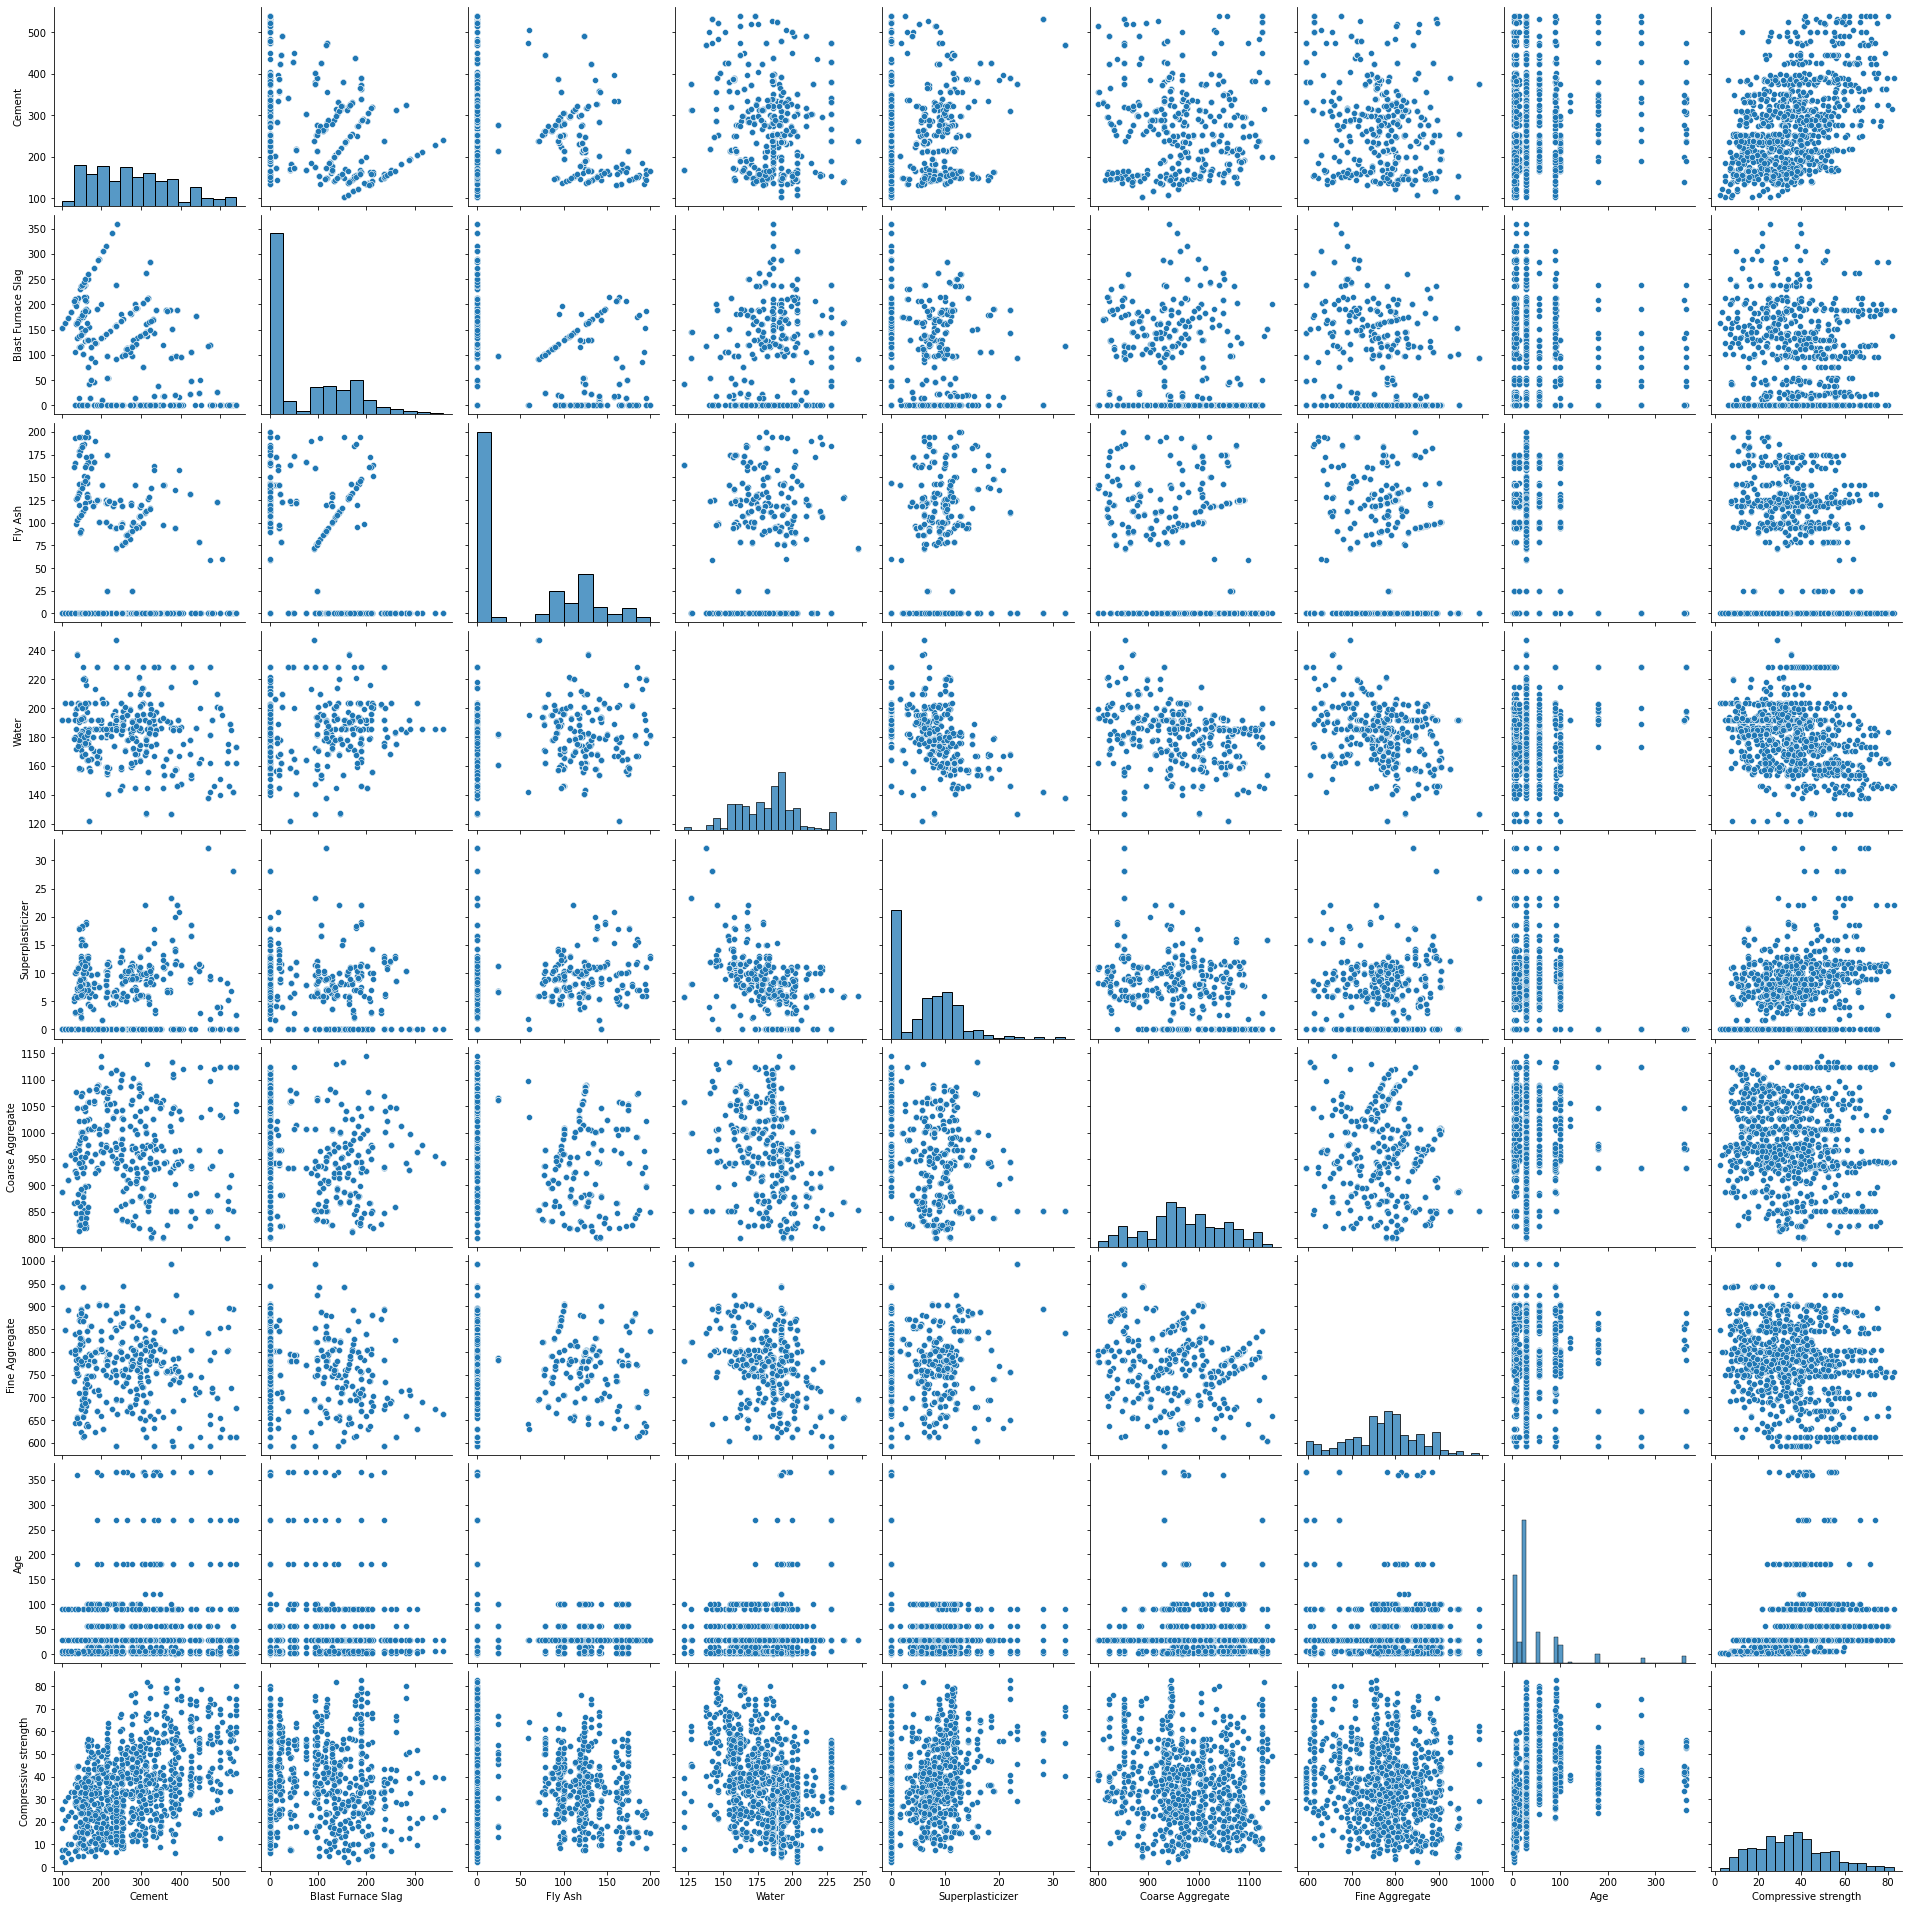

In [11]:
sns.pairplot(concrete_data, height=3)

The pair plot gives a visual representation of correlations between all the features.

We can plot scatter plots between Compressive strength and other features to see more complex relations.

# Compressive Strength vs Cement, Age, Water

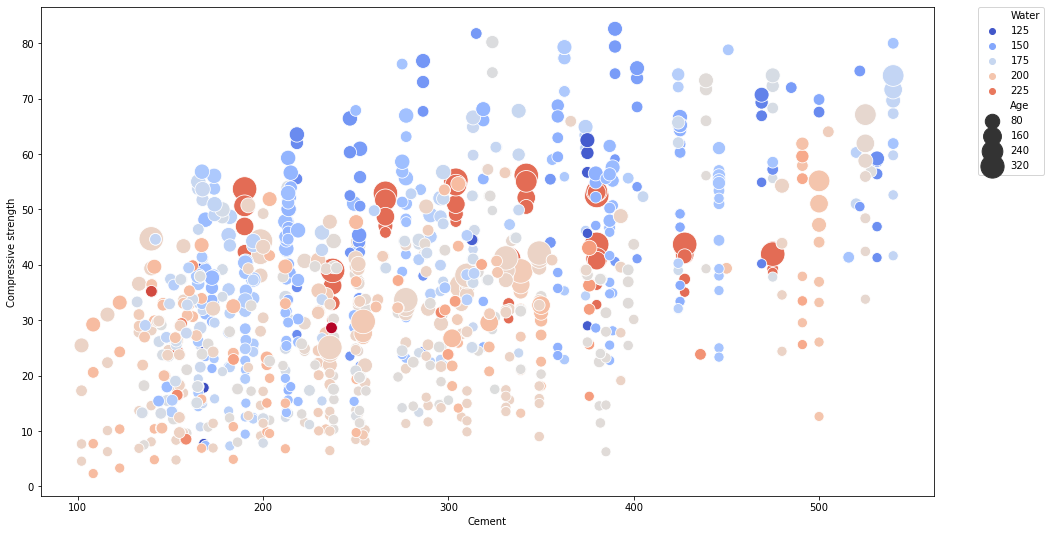

In [12]:
plt.figure(figsize=(16, 9))
sns.scatterplot(y="Compressive strength", x="Cement", hue="Water",size="Age", palette='coolwarm', data=concrete_data, sizes=(100, 600))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

### The observations we can make from this plot:
- **Compressive strength increases as the amount of cement increases**, as the dots move up when we move towards right on the x-axis.
- **Compressive strength increases with age** (as the size of dots represents the age), this not the case always but can be up to an extent.
- **Cement with less age requires more cement for higher strength**, as the smaller dots are moving up when we move towards right on the x-axis.
- **The older the cement is the more water it requires**, can be confirmed by observing the colour of the dots. Larger dots with dark colour indicate high age and more water.
- **Concrete strength increases when less water is used in preparing it** since the dots on the lower side (y-axis) are darker and the dots on higher-end (y-axis) are brighter.

# Compressive Strength vs Fine aggregate, Superplasticizer, Fly Ash

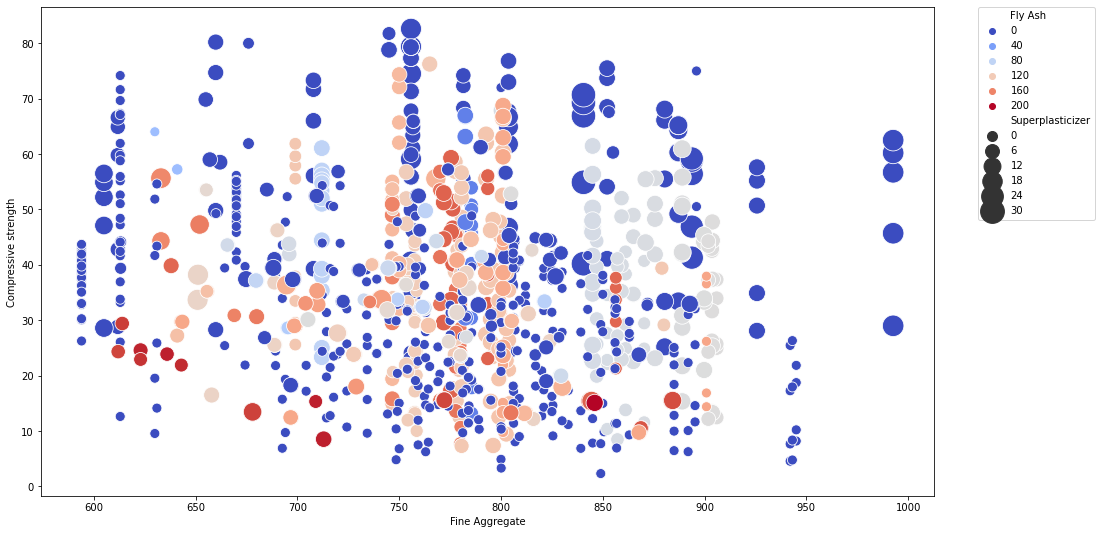

In [13]:
plt.figure(figsize=(16, 9))
sns.scatterplot(y="Compressive strength", x="Fine Aggregate", hue="Fly Ash", size="Superplasticizer", palette='coolwarm', data=concrete_data, sizes=(100, 600))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

### Observations:

- **Compressive strength decreases Fly ash increases**, as darker dots are concentrated in the region representing low compressive strength.
- **Compressive strength increases with Superplasticizer** since larger the dot the higher they are in the plot.

We can visually understand 2D, 3D and max up to 4D plots (features represented by colour and size) as shown above, we can further use row-wise and column-wise plotting features by seaborn to do further analysis, but still, we lack the ability to track all these correlations by ourselves. For this reason, we can turn to Machine Learning to capture these relations and give better insights into the problem.

# Data preprocessing

Before we fit machine learning models on the data, we need to split the data into train, test splits. The features can be rescaled to have a mean of zero and a standard deviation of 1 i.e. all the features fall into the same range.

### Separating Input Features and Target Variable

In [14]:
x = concrete_data.iloc[:,:-1] # Features - all columns, but last
y = concrete_data.iloc[:,-1] # Target - last column

### Splitting data into Training and Test splits     

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

### Scaling
Standardizing the data i.e. to rescale the features to have a mean of zero and standard deviation of 1.

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

The scaler is fit on the training data and not on testing data. Since, we are training our model on rescaled Training data and the model performs well when the testing data follows same distribution. And if the scaler is fit on testing data again, this would result in testing data having a different mean and standard deviation. Resulting in loss of performance.

# Model building
After preparing the data, we can fit different models on the training data and compare their performance to choose the algorithm with good performance. As this is a regression problem, we can use RMSE (Root Mean Square Error) and $R²$ score as evaluation metrics.

### Linear Regression
We will start with Linear Regression since this is the go-to algorithm for any regression problem. The algorithm tries to form a linear relationship between the input features and the target variable i.e. it fits a straight line given by:

# y = W * X + b,  

The magnitude of these coefficients can be further controlled by using regularization terms to the cost functions. 

Adding the sum of the magnitudes of the coefficients will result in the coefficients being close to zero, this variation of linear regression is called ***Lasso Regression***. 

Adding the sum of squares of the coefficients to the cost function will make the coefficients be in the same range and this variation is called ***Ridge Regression***. 

Both these variations help in reducing the model complexity and therefore reducing the chances of overfitting on the data.

In [17]:
# Importing models
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Linear Regression
lr = LinearRegression()
# Lasso Regression
lasso = Lasso()
# Ridge Regression
ridge = Ridge()

# Fitting models on Training data 
lr.fit(x_train, y_train)
lasso.fit(x_train, y_train)
ridge.fit(x_train, y_train)

# Making predictions on Test data
y_pred_lr = lr.predict(x_test)
y_pred_lasso = lasso.predict(x_test)
y_pred_ridge = ridge.predict(x_test)

### Evaluation 
Comparing the Root Mean Squared Error (RMSE), Mean Squared Error (MSE), Mean Absolute Error(MAE) and R2 Score.

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))
print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lasso)),mean_squared_error(y_test, y_pred_lasso),
            mean_absolute_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)))
print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_ridge)),mean_squared_error(y_test, y_pred_ridge),
            mean_absolute_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 10.29 		 105.78 	8.23 		0.57
LassoRegression 	 10.68 		 114.13 	8.66 		0.54
RidgeRegression 	 10.29 		 105.86 	8.24 		0.57


There is not much difference between the performance with these three algorithms, we can plot the coefficients assigned by the three algorithms for the features with the following code.

### Plotting the coefficients

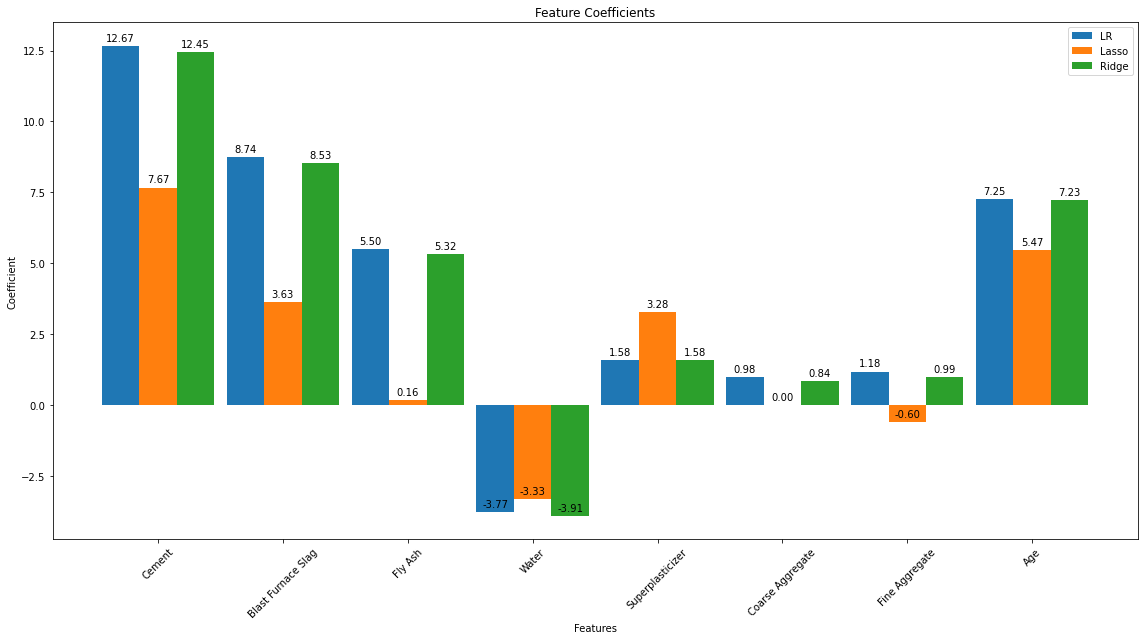

In [19]:
column_names = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Compressive strength']

coeff_lr = lr.coef_
coeff_lasso = lasso.coef_
coeff_ridge = ridge.coef_

labels = column_names[:-1]

x = np.arange(len(labels)) 
width = 0.3

fig, ax = plt.subplots(figsize=(16, 9))
rects1 = ax.bar(x - 2*(width/2), coeff_lr, width, label='LR')
rects2 = ax.bar(x, coeff_lasso, width, label='Lasso')
rects3 = ax.bar(x + 2*(width/2), coeff_ridge, width, label='Ridge')

ax.set_ylabel('Coefficient')
ax.set_xlabel('Features')
ax.set_title('Feature Coefficients')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

As seen in the figure, Lasso regression pushes the coefficients towards zero, reducing the complexity of the model, and the coefficients with the normal Linear Regression and Ridge Regression are almost the same.

We can further see how the predictions are by plotting the true values and predicted values

### Plotting predictions

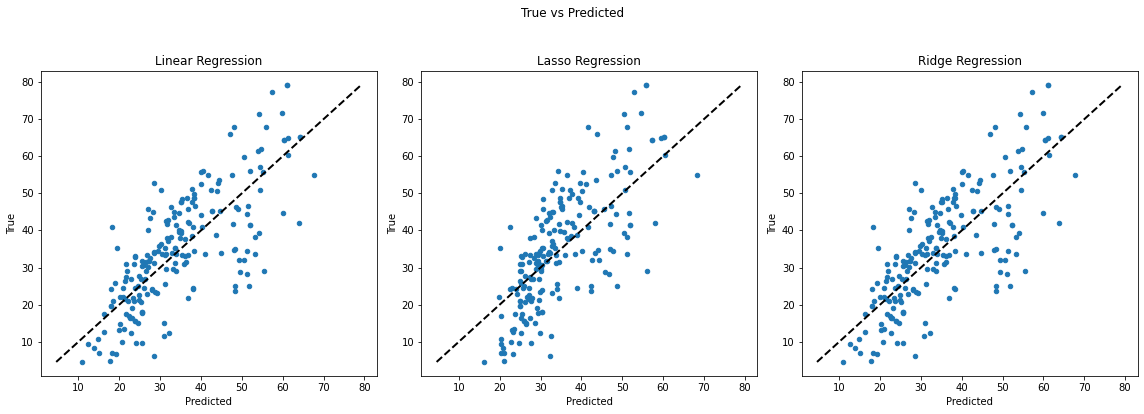

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,6))

ax1.scatter(y_pred_lr, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regression")

ax2.scatter(y_pred_lasso, y_test, s=20)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Lasso Regression")

ax3.scatter(y_pred_ridge, y_test, s=20)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("Ridge Regression")

fig.suptitle("True vs Predicted")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

Looking at the graphs between predicted and true values of the target variable, we can conclude that Linear and Ridge Regression perform well as the predictions are closer to the actual values. While Lasso Regression reduces the complexity at the cost of loosing performance in this case. (The closer the points are to the black line, the less the error is.)

If the predicted values and the target values are equal, then the points on the scatter plot will lie on the straight line. As we can see here, none of the model predicts the **Compressive strength** correctly.

So we can conclude that

# These regression models are underfit!
